# **Lista de exercícios 4**

## **Métodos implementados**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmath

In [ ]:
def bisection(f,l,u,epsilon=1e-6,maxiter=100):
  iter = 1
  err = 1
  x = None
  xra = float('+inf')

  while err > epsilon and iter < maxiter:
    x = (l+u)/2

    if f(l)*f(x) < 0:
      u = x
    elif f(x)*f(u) < 0:
      l = x
    elif f(l)*f(u) == 0:
      break

    err = abs(x-xra)/abs(x)
    xra = x
    iter += 1

  return x, iter, err

In [ ]:
def false_position(f,l,u,epsilon=1e-6,maxiter=100):
  iter = 1
  err = 1
  x = None
  xra = float('+inf')

  while err > epsilon and iter < maxiter:
    x = (l*f(u) - u*f(l))/(f(u) - f(l))

    if f(l)*f(x) < 0:
      u = x
    elif f(x)*f(u) < 0:
      l = x
    elif f(l)*f(u) == 0:
      break

    err = abs(x-xra)/abs(x)
    xra = x
    iter += 1

  return x, iter, err

In [ ]:
def fixed_point(f, x0, epsilon=1e-6, maxiter=100, a=1, gen_g=False):
  if gen_g:
    g = lambda x : x - a*f(x)
  else:
    g = f
  err = 1
  iter = 0
  x1 = None

  while err > epsilon and iter < maxiter:
    x1 = g(x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1

  return x0, err, iter

In [ ]:
def newton_raphson(f, df, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x1 = None

  while err > epsilon and iter < maxiter:
    x1 = x0 - f(x0)/df(x0)
    err = abs(x1-x0)/abs(x1)
    x0 = x1
    iter += 1
    print(f"x_{iter} = {x0}")

  return x0, err, iter

In [ ]:
def secant(f, x1, x0, epsilon=1e-5, maxiter=100):
  err = 1
  iter = 0
  x_ant, x = x1, x0

  phi = lambda x1,x0: (x1*f(x0) - x0*f(x1))/(f(x0) - f(x1))

  while err > epsilon and iter < maxiter:
    x_ant, x = x, phi(x_ant, x)
    err = abs(x - x_ant)/abs(x)
    iter += 1

  return x, err, iter

In [ ]:
def muller(f, x0, x1, x2, tol=1e-6, max_iter=100):
    iter_count = 0

    while iter_count < max_iter:
        f0, f1, f2 = f(x0), f(x1), f(x2)
        h0, h1 = x1 - x0, x2 - x1
        d0, d1 = (f1 - f0) / h0, (f2 - f1) / h1
        a = (d1 - d0) / (h1 + h0)
        b = a * h1 + d1
        c = f2

        delta = cmath.sqrt(b**2 - 4*a*c)
        if abs(b - delta) < abs(b + delta):
            den = b + delta
        else:
            den = b - delta
        dxr = -2 * c / den
        xr = x2 + dxr

        if abs(xr - x2)/abs(xr) < tol:
            print(f'x={xr}; erro={abs(xr - x2)/abs(xr)}; iter={iter_count}')
            return xr

        x0, x1, x2 = x1, x2, xr
        iter_count += 1

In [ ]:
def calc_pol_conv(vetor,grau,x):
    soma = vetor[0]
    for i in range(1,grau+1):
        soma = soma+vetor[i]*x**i

    return soma

In [ ]:
def metodo_horner(vetor,grau,x):
    soma = vetor[grau]
    for i in range(0,grau):
        soma = soma*x+vetor[grau-i-1]
    return soma

In [ ]:
def estima_qraizes(vet_coef):
  qv = 0
  i=0
  j=1
  while i < len(vet_coef)-1 and j < len(vet_coef):
    if vet_coef[i]*vet_coef[j] < 0:
      qv+=1
      i=i+1
      j=j+1
    elif vet_coef[i]*vet_coef[j] == 0:
      if vet_coef[j] == 0:
        j=j+1
      else:
        i=i+1
    else:
      i=i+1
      j=j+1

  nrp = []
  for i in range(0,qv+1):
    if (qv - i)%2==0:
      nrp.append(i)


  qv = 0
  i=0
  j=1
  for k in range(0,len(vet_coef)):
    vet_coef[k]=vet_coef[k]*((-1)**k)


  while i < len(vet_coef)-1 and j < len(vet_coef):
    if vet_coef[i]*vet_coef[j] < 0:
      qv+=1
      i=i+1
      j=j+1
    elif vet_coef[i]*vet_coef[j] == 0:
      if vet_coef[j] == 0:
        j=j+1
      else:
        i=i+1
    else:
      i=i+1
      j=j+1

  nrn = []
  for i in range(0,qv+1):
    if (qv - i)%2==0:
      nrn.append(i)

  nrc = []
  grau = len(vet_coef)-1
  for i in nrp:
    for j in nrn:
      nrc.append(grau - i - j)

  return nrp,nrn,nrc

## **1) Para os polinômios dados abaixo, desenvolva um algoritmo para estimar o número de raízes reais positivas (_p_), o número de raízes reais negativas (_neg_), o número de raízes complexas conjugadas e a região circular (valor do raio _r_) onde se encontram as correspondentes raízes:**

### (a) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
coefs_fa = [1, -7.8, 14.5, 3, -20]
res = estima_qraizes(coefs_fa)
res

([1, 3], [1], [2, 0])

In [ ]:
fa = lambda x: x**4 -7.5*x**3 + 14.5*x**2 + 3*x - 20

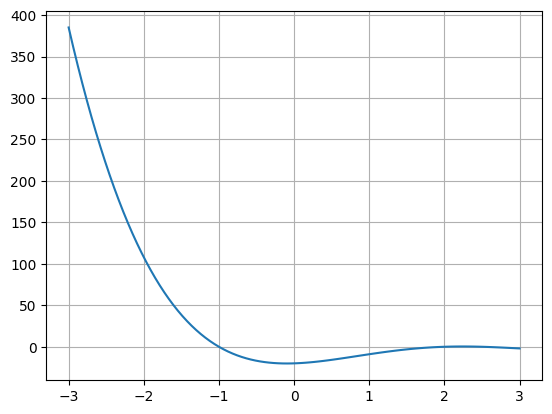

In [ ]:
x = np.linspace(-3,3,100)
plt.plot(x, fa(x))
plt.grid()

### (b) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [ ]:
coefs_fb = [1, -5, 1, -6, -7, 10]
estima_qraizes(coefs_fb)

([0, 2, 4], [1], [4, 2, 0])

In [ ]:
fb = lambda x: x**5 - 5*x**4 + x**3 - 6*x**2 - 7*x + 10

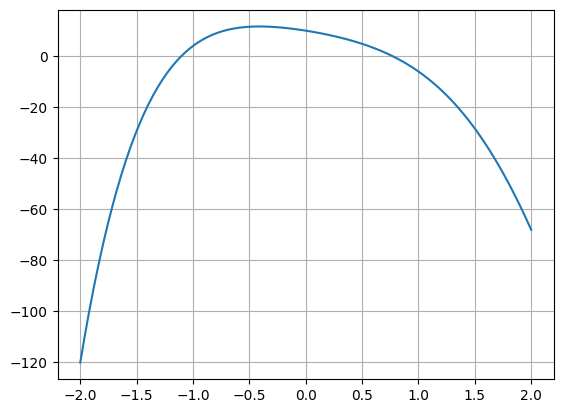

In [ ]:
x = np.linspace(-2,2,100)
plt.plot(x,fb(x))
plt.grid()

### (c) $f(x) = x^{3} + x^{2} - 3x - 5$

In [ ]:
coefs_fc = [1, 1, -3, 5]
estima_qraizes(coefs_fc)

([0, 2], [1], [2, 0])

In [ ]:
fc = lambda x: x**3 + x**2 - 3*x - 5

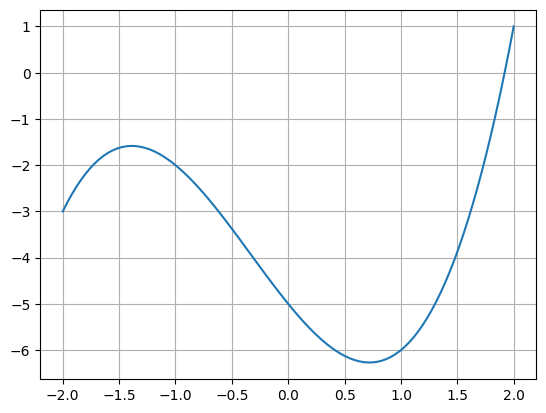

In [ ]:
x = np.linspace(-2,2,100)
plt.plot(x,fc(x))
plt.grid()

### (d) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
coefs_fd = [1, -0.5, 4, -3]
estima_qraizes(coefs_fd)

([1, 3], [0], [2, 0])

In [ ]:
fd = lambda x: x**3 - 0.5*x**2 + 4*x - 3

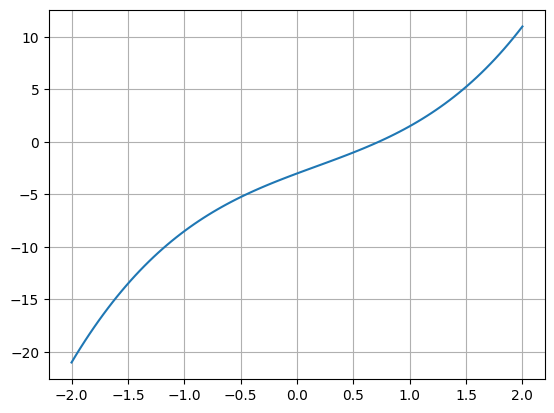

In [ ]:
x = np.linspace(-2,2,100)
plt.plot(x,fd(x))
plt.grid()

### (e) $f(x) = 2x^{4} + 6x^{2} + 10$

In [ ]:
coefs_fe = [2, 0, 6, 0, 10]
estima_qraizes(coefs_fe)

([0], [0], [4])

In [ ]:
fe = lambda x: 2*x**4 + 6*x**2 + 10

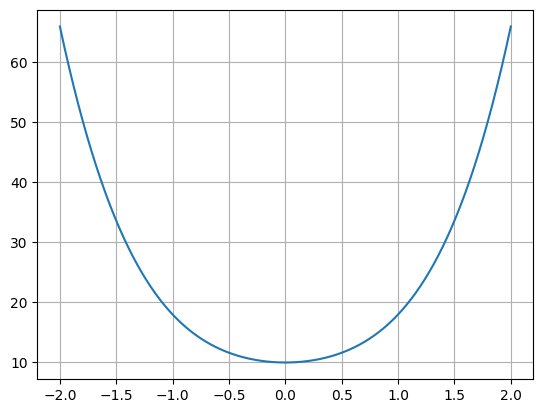

In [ ]:
x = np.linspace(-2,2,100)
plt.plot(x,fe(x))
plt.grid()

### (f) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [ ]:
coefs_ff = [1, 0, -6, -8, 0]
estima_qraizes(coefs_ff)

([1], [0, 2], [3, 1])

In [ ]:
ff = lambda x: x**4 - 6*x**2 - 8*x + 8

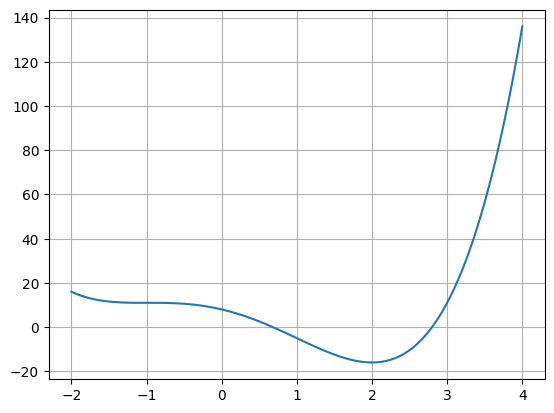

In [ ]:
x = np.linspace(-2,4,100)
plt.plot(x,ff(x))
plt.grid()

## **2) Determine estimativas iniciais apropriadas, e aplique os seguintes métodos para a determinação de uma raiz real, respectivamente para cada item acima:**

### (a) Método da Secante

#### ·) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
secant(fa, -2, 0)

(-0.9999999976896543, 4.963067284400342e-06, 13)

#### · ) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [ ]:
secant(fb, 0, 1)

(0.7710140905508406, 1.7109061822491692e-07, 6)

#### · ) $f(x) = x^{3} + x^{2} - 3x - 5$

In [ ]:
secant(fc, 1, 2)

(1.9196395658296352, 8.674572172801059e-08, 5)

#### · ) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
secant(fd, 0, 1)

(0.7212304526891997, 2.599847189226545e-07, 5)

#### · ) $f(x) = 2x^{4} + 6x^{2} + 10$

A função não possui raiz real.

#### · ) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [ ]:
secant(ff, 0, 1)

(0.6799606606967354, 5.113360952417449e-08, 5)

### (b) Método de Newton-Raphson

#### ·) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
dfa_dx = lambda x: 4*x**3 - 22.5*x**2 + 29*x + 3

In [153]:
newton_raphson(fa, dfa_dx, -2)

x_1 = -1.3898305084745761
x_2 = -1.0870600918738713
x_3 = -1.0056640452373584
x_4 = -1.00002611303254
x_5 = -1.0000000005584846
x_6 = -1.0


(-1.0, 5.584845919059944e-10, 6)

#### · ) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [ ]:
dfb_dx = lambda x: 5*x**4 - 20*x**3 + 3*x**2 - 12*x - 7

In [ ]:
newton_raphson(fb, dfb_dx, 0)

x_1 = 1.4285714285714286
x_2 = 0.9924973388546517
x_3 = 0.8043242702224611
x_4 = 0.7718576739159702
x_5 = 0.7710146414559232
x_6 = 0.7710140905451858


(0.7710140905451858, 7.145274570584521e-07, 6)

#### · ) $f(x) = x^{3} + x^{2} - 3x - 5$

In [ ]:
dfc_dx = lambda x: 3*x**2 + 2*x - 3

In [ ]:
newton_raphson(fc, dfc_dx, 1)

x_1 = 4.0
x_2 = 2.811320754716981
x_3 = 2.177562040704926
x_4 = 1.9507006900838688
x_5 = 1.9201738551655414
x_6 = 1.919639727981344
x_7 = 1.9196395658394332


(1.9196395658394332, 8.446476811170034e-08, 7)

#### · ) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
dfd_dx = lambda x: 3*x**2 - x + 4

In [ ]:
newton_raphson(fd, dfd_dx, 0)

x_1 = 0.75
x_2 = 0.7215189873417721
x_3 = 0.7212304813210685
x_4 = 0.7212304526956714


(0.7212304526956714, 3.9689667769487646e-08, 4)

#### · ) $f(x) = 2x^{4} + 6x^{2} + 10$

A função não possui raiz real.

#### · ) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [ ]:
dff_dx = lambda x: 4*x**3 - 12*x - 8

In [ ]:
newton_raphson(ff, dff_dx, 0)

x_1 = 1.0
x_2 = 0.6875
x_3 = 0.6799727692860409
x_4 = 0.6799606607288428
x_5 = 0.6799606606971043


(0.6799606606971043, 4.667696611144084e-11, 5)

### (c) Método do Ponto Fixo

#### ·) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
g = lambda x: 20 / (x**3 -7.5*x**2 +14.5*x +3)
fixed_point(g, 0.5)

(2.000004454164991, 9.544460395390297e-07, 37)

#### · ) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [162]:
g = lambda x: -10 / (x**4 - 5*x**3 +x**2 -6*x -7)
fixed_point(g, 0)

(0.7710138728393666, 6.939087618865389e-07, 40)

#### · ) $f(x) = x^{3} + x^{2} - 3x - 5$

In [155]:
#g = lambda x: (x**3 + x**2 - 5) / 3
g = lambda x: (-x**2 +3*x +5)**(1/3)
fixed_point(g, 0)

(1.9196395355050517, 2.239486785303843e-07, 7)

#### · ) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
g = lambda x: (-x**3 +0.5*x**2 +3)/4
fixed_point(g,0)

(0.72123056584922, 9.046158455912099e-07, 9)

#### · ) $f(x) = 2x^{4} + 6x^{2} + 10$

A função não possui raiz real.

#### · ) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [175]:
g = lambda x: (6*x**2 +8*x - 8)**(1/4)
fixed_point(g,1)

(2.7994444878273015, 4.847524640309014e-07, 20)

### (d) Método da Falsa-Posição

#### ·) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
false_position(fa, -2 , 0)

(-0.9999990533423483, 23, 8.954868358588424e-07)

#### · ) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [ ]:
false_position(fb, 0, 1)

(0.7710140051313044, 10, 5.590009492480414e-07)

#### · ) $f(x) = x^{3} + x^{2} - 3x - 5$

In [ ]:
false_position(fc, 1, 2)

(1.9196395550523742, 7, 1.2161019966554025e-07)

#### · ) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
false_position(fd, 0, 1)

(0.7212303965872423, 8, 6.952454035955444e-07)

#### · ) $f(x) = 2x^{4} + 6x^{2} + 10$

A função não possui raiz real.

#### · ) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [ ]:
false_position(ff, 0, 1)

(0.6799606457942888, 7, 4.5295734798927806e-07)

### (e) Método da Bissecção

#### ·) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
bisection(fa, -2, 1)

(-1.000000238418579, 23, 7.152555667744716e-07)

#### · ) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [ ]:
bisection(fb, 0, 1)

(0.7710137367248535, 22, 6.184548153819608e-07)

#### · ) $f(x) = x^{3} + x^{2} - 3x - 5$

In [ ]:
bisection(fc, 1, 2)

(1.919637680053711, 20, 9.935982464978145e-07)

#### · ) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
bisection(fd, 0, 1)

(0.7212300300598145, 22, 6.611443483067102e-07)

#### · ) $f(x) = 2x^{4} + 6x^{2} + 10$

A função não possui raiz real.

#### · ) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [ ]:
bisection(ff, 0, 1)

(0.6799607276916504, 22, 7.012716158209682e-07)

## **3) Aplique o método de Muller a cada item (polinômio) da questão 1, com apropriados valores iniciais, para determinação das raízes. Indique em uma tabela quais valores iniciais possibilitaram a geração de quais raízes.**

#### ·) $f(x) = x^{4} - 7,5x^{3} + 14,5x^{2} + 3x - 20$

In [ ]:
muller(fa,-3,-2,-1.7)

x=(-1.000000000000001-3.981818405975047e-16j); erro=1.0351570424403833e-08; iter=5


(-1.000000000000001-3.981818405975047e-16j)

#### · ) $f(x) = x^{5} - 5x^{4} + x^{3} - 6x^{2} - 7x + 10$

In [ ]:
muller(fb,-0.5,0,0.35)

x=(0.7710140905449507+0j); erro=8.462654982419744e-10; iter=4


(0.7710140905449507+0j)

#### · ) $f(x) = x^{3} + x^{2} - 3x - 5$

In [ ]:
muller(fc,-1,1,1.5)

x=(1.919639565839418+0j); erro=6.773716476970743e-10; iter=4


(1.919639565839418+0j)

#### · ) $f(x) = x^{3} - 0,5x^{2} + 4x - 3$

In [ ]:
muller(fd,-2,1,0)

x=(0.721230452695669+0j); erro=2.3986307442000677e-08; iter=4


(0.721230452695669+0j)

#### · ) $f(x) = 2x^{4} + 6x^{2} + 10$

In [ ]:
muller(fe,-2,-1.5,-1)

x=(-0.6066580492742917-1.3667603991723798j); erro=2.902469362534589e-07; iter=6


(-0.6066580492742917-1.3667603991723798j)

#### · ) $f(x) = x^{4} - 6x^{2} - 8x + 8$

In [ ]:
muller(ff,-2,-1,0)

x=(0.679960660697106-1.1838916886200986e-15j); erro=1.951594337827434e-08; iter=6


(0.679960660697106-1.1838916886200986e-15j)